<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/Copy_to_git_hub__nlp_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All text on :https://www.blogger.com/u/1/blog/post/edit/2467837214843025551/8843146277662718511


In [ ]:
import numpy as np
import pandas as pd
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import requests
import nltk.tree

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns #statist graph package
import matplotlib.pyplot as plt #plot package

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
remove_ch = { ',', '(', ')','\n', 'also', '.'}

stop_word_ammended= stop_words.union(remove_ch)

First look at the 3 versions of Putin's Bio:
Question: Write 500 words Vladimir Putin bio
asked 3 times 


In [ ]:
import os

file_list = []

diro = "/content/drive/MyDrive/GPT/text_files/"

for file in os.listdir(diro):
    if file.endswith('.txt'):
        temp = os.path.join(diro, file)
        file_list.append(temp)
print(file_list)

['/content/drive/MyDrive/GPT/text_files/1VladimirPutinBio500words.txt', '/content/drive/MyDrive/GPT/text_files/12VladimirPutinBio500words.txt', '/content/drive/MyDrive/GPT/text_files/13VladimirPutinBio500words.txt', '/content/drive/MyDrive/GPT/text_files/21VladimirPutinDictetorBio500words.txt', '/content/drive/MyDrive/GPT/text_files/22VladimirPutinDictetorBio500words.txt', '/content/drive/MyDrive/GPT/text_files/23VladimirPutinDictetorBio500words.txt', '/content/drive/MyDrive/GPT/text_files/31VladimirPutinSaviourBio500words.txt', '/content/drive/MyDrive/GPT/text_files/32VladimirPutinSaviourBio500words.txt', '/content/drive/MyDrive/GPT/text_files/40VladimirPutinFather_of_Russia.txt', '/content/drive/MyDrive/GPT/text_files/82Vladimir_Putin_ushering new RussiaCONCATfather.txt', '/content/drive/MyDrive/GPT/text_files/83VladimirPutin_ ushering_new_RussiaCONCATfather.txt', '/content/drive/MyDrive/GPT/text_files/41VladimirPutinFather_of_ModernRussia.txt', '/content/drive/MyDrive/GPT/text_files

In [ ]:
len(file_list)

30

In [ ]:
# Topic specific clean up
def clean_up(text):
    text =text.replace('St. Petersburg', 'St.Petersburg' )
    text =text.replace('Vladimir Vladimirovich', '')
    text =text.replace('Vladimir', '')
    text =text.replace("'s", "" )
    text =text.replace('Russian', 'Russia') # doing this manually as lemm and stemm do too much or not at all
    return text

In [ ]:
# Initial clean up and tokenization


def tokenizing(all_text, name):

  results_tokens_bio_neutral = {}
  clean_text = clean_up(all_text)
  
  sentence_tokens = sent_tokenize(all_text)  # process file text. tokenize sentences  

  sentences_length={}
  for sent in sentence_tokens:
    temp = word_tokenize(sent)
    sentences_length[sent]=len(temp)

  word_tokens = word_tokenize(all_text)
  count_all = len(word_tokens)
  filtered_word_tokens = [ word for word in word_tokens if word.casefold() not in stop_word_ammended]
  ## cleaned text opition:
  # Clean Tokens:
  word_tokens_clean = word_tokenize(clean_text)
  filtered_clean_tokens = [ word for word in word_tokens_clean if word.casefold() not in stop_word_ammended]

  results_tokens_bio_neutral[name]=clean_text, sentence_tokens, filtered_word_tokens, filtered_clean_tokens, count_all,sentences_length

  return results_tokens_bio_neutral


In [ ]:
# Add POS to tags and counts them
def tag_dict (data):
  lotr_pos_tags = nltk.pos_tag(data)
  temp_tag= pd.DataFrame.from_records(lotr_pos_tags, columns =['Word', 'Tag'])
  temp_tag['Tag_Count']=temp_tag['Tag']
  temp_3 = temp_tag.groupby(['Word', 'Tag'])['Tag_Count'].count().reset_index()
  return temp_3

In [ ]:
# Returns number of verbs, adjectives and adverbs in df containing tokens and POS data
def count_types (data):
  
  adj_verb={}

  verb_count = ((data[data['Tag'].str.startswith('V')]).iloc[:, 1].count())
  verb_dict = {"Verb_count": verb_count}
  adj_count = ((data[data['Tag']=='JJ']).iloc[:, 1].count())
  adj_dict = {"Adjective_count": adj_count}
  noun_count = ((data[data['Tag'].str.startswith('N')]).iloc[:, 1].count())
  noun_dict = {"All_Nouns": noun_count}
  adverb_count = ((data[data['Tag'].str.startswith('RB')]).iloc[:, 1].count())
  adverb_dict = {"All_Adverbs": adverb_count}
  adj_verb[f'Counts']= verb_dict , adj_dict, noun_dict,adverb_dict

  return adj_verb

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize 

listo=[]
for item in file_list:
  with open(item) as outfile:  # open for read
    alltext = outfile.read()  # read entire file
    res = tokenizing(alltext,item[38:-4] )
    listo.append(res)



In [ ]:
print('Number of words per sentance:'  )
for i in range(len(listo)):
  stringo = str(listo[i].keys())[12:-3]
  test = list(listo[i][stringo][5].values())
  print(stringo, 'Length of sentences:', test)#, 'average:',listo[i][stringo][5].values()  listo[i][stringo][5].values()


Number of words per sentance:
1VladimirPutinBio500words Length of sentences: [21, 15, 13, 15, 17, 20, 13, 14, 19, 18, 11, 12, 21, 15, 23, 24, 17, 22, 10, 22, 24, 24, 24, 32]
12VladimirPutinBio500words Length of sentences: [19, 25, 19, 19, 15, 13, 32, 33, 26, 19, 13, 19, 21, 28, 22, 15, 27, 24, 26, 15, 28, 22]
13VladimirPutinBio500words Length of sentences: [25, 24, 19, 19, 13, 32, 22, 31, 25, 12, 28, 13, 32, 19, 17, 17, 19, 28, 18, 32, 23, 34, 29]
21VladimirPutinDictetorBio500words Length of sentences: [30, 16, 18, 18, 24, 19, 16, 25, 21, 27, 22, 17, 17, 16, 28, 20, 29, 33, 41, 29, 21, 26, 32]
22VladimirPutinDictetorBio500words Length of sentences: [28, 25, 19, 43, 26, 14, 18, 43, 40, 23, 12, 29, 27, 23, 32, 22, 30, 42, 21, 17]
23VladimirPutinDictetorBio500words Length of sentences: [19, 25, 33, 15, 14, 34, 34, 15, 25, 16, 18, 21, 16, 28, 36, 38, 19, 21, 26, 25, 45, 49]
31VladimirPutinSaviourBio500words Length of sentences: [46, 15, 16, 42, 18, 23, 28, 22, 22, 24, 20, 20, 27, 14, 33, 2

In [ ]:
data_leng_sent = []
print('Average number of words in human text and ChatGPT text:')
for i in range(len(listo)):
  stringo = str(listo[i].keys())[12:-3]
  avg = np.round(np.mean(list(listo[i][stringo][5].values())),2)
  print(stringo, ':','Average Length:',avg)
  data_leng_sent.append(avg)



Average number of words in human text and ChatGPT text:
1VladimirPutinBio500words : Average Length: 18.58
12VladimirPutinBio500words : Average Length: 21.82
13VladimirPutinBio500words : Average Length: 23.09
21VladimirPutinDictetorBio500words : Average Length: 23.7
22VladimirPutinDictetorBio500words : Average Length: 26.7
23VladimirPutinDictetorBio500words : Average Length: 26.0
31VladimirPutinSaviourBio500words : Average Length: 24.08
32VladimirPutinSaviourBio500words : Average Length: 22.81
40VladimirPutinFather_of_Russia : Average Length: 22.67
82Vladimir_Putin_ushering new RussiaCONCATfather : Average Length: 24.0
83VladimirPutin_ ushering_new_RussiaCONCATfather : Average Length: 37.67
41VladimirPutinFather_of_ModernRussia : Average Length: 35.33
42VladimirPutinFather_of_Modern_Russia : Average Length: 21.25
43VladimirPutinFather_of_Modern_Russia : Average Length: 35.67
44VladimirPutinFather_of_Modern_Russia : Average Length: 21.0
51VladimirPutinDestroyer_of_democracy_and _engineer

In [ ]:
np.mean(data_leng_sent)

25.646000000000004

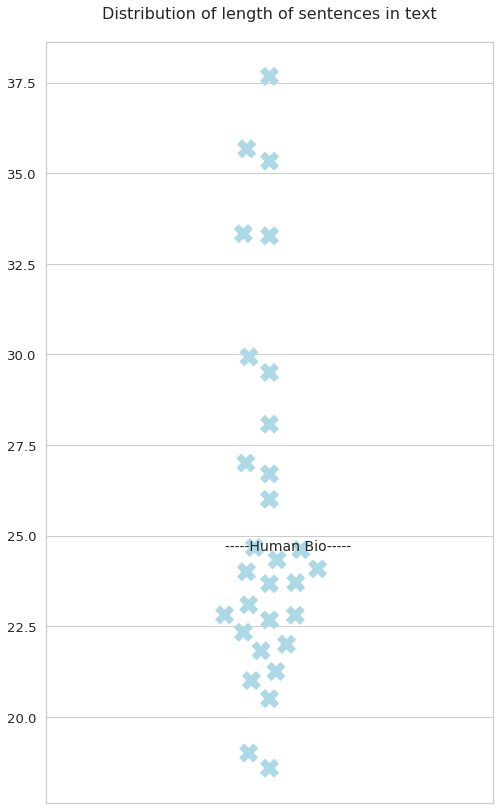

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,14))
sns.swarmplot(y=data_leng_sent, color='lightblue', marker="x", linewidth=20)

plt.text(-0.10,24.61,  '-----Human Bio-----', fontsize=14)

plt.title('Distribution of length of sentences in text\n',fontsize=16)
plt.savefig('/content/drive/MyDrive/GPT/graphs/Distribution_Sentences_Length_AVG.jpg')

In [ ]:
lenght_text = {}
for i in range(len(listo)):
  stringo = str(listo[i].keys())[12:-3]
  lenght_text[stringo]=listo[i][stringo][4]

leng_text=pd.DataFrame.from_dict(lenght_text, orient='index').reset_index()
leng_text.columns=['Text_name', 'Words_in_text']
leng_text[leng_text['Words_in_text'] >300]

,Text_name,Words_in_text
0,1VladimirPutinBio500words,446
1,12VladimirPutinBio500words,480
2,13VladimirPutinBio500words,531
3,21VladimirPutinDictetorBio500words,545
4,22VladimirPutinDictetorBio500words,534
5,23VladimirPutinDictetorBio500words,572
6,31VladimirPutinSaviourBio500words,578
7,32VladimirPutinSaviourBio500words,479
25,71VladimirPutin_and_core_principles_modern _Ru...,421
26,72VladimirPutin_and_core_principles_modern _Ru...,366


In [ ]:
sent_leng_df = []
for item in range(len(listo)):
  stringo = str(listo[item].keys())[12:-3]
  if len(listo[item][stringo][5].values())>6:
    df_temp = pd.DataFrame(listo[item][stringo][5].values(), columns =[stringo])
    sent_leng_df.append(df_temp)


In [ ]:
#doing it this way to avoid using ordered dict
human_bio = pd.concat(sent_leng_df, axis=1)[['human_bio']]


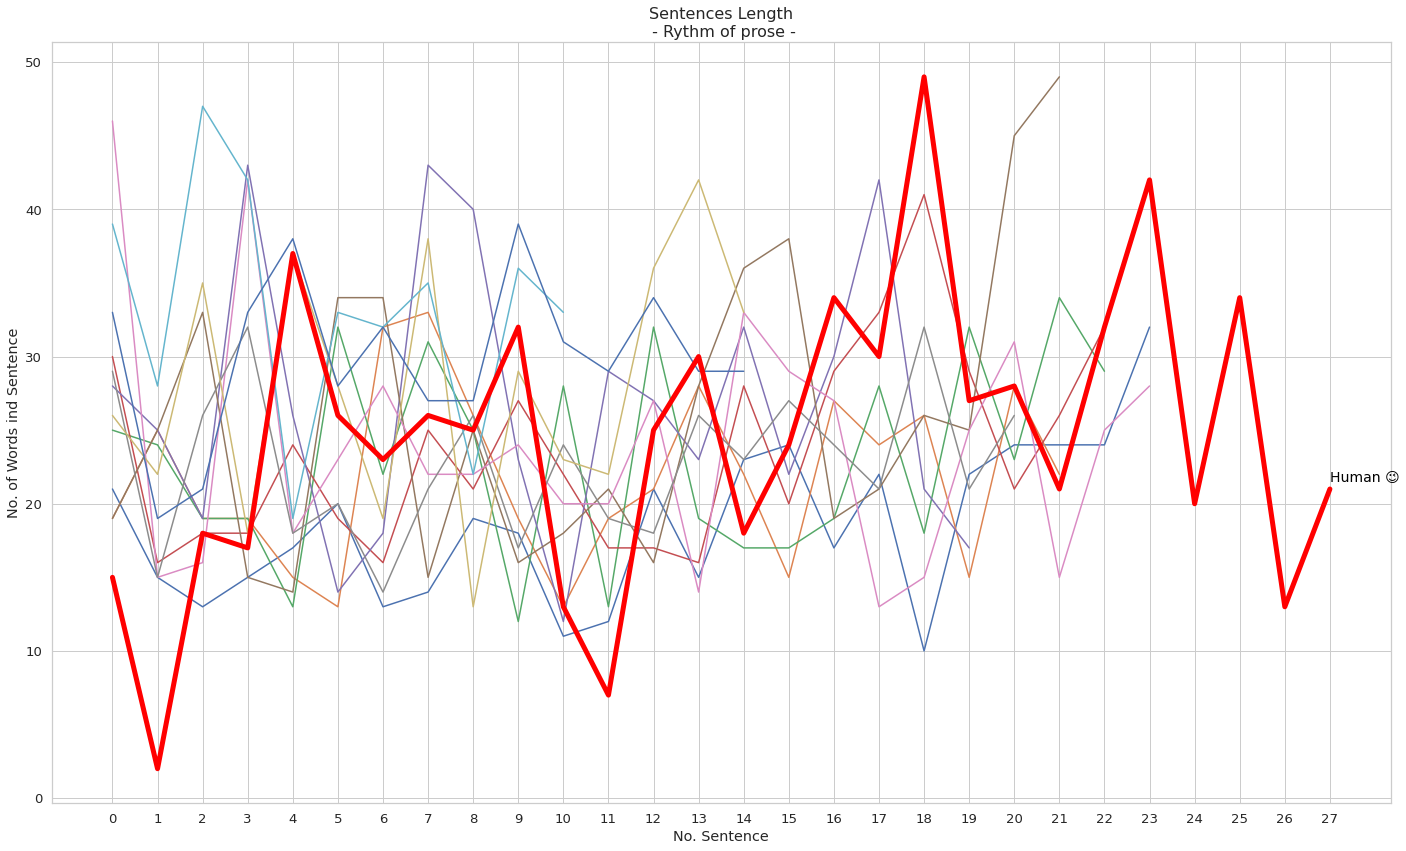

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,14))

for df in range(len(sent_leng_df)):
  plt.plot(sent_leng_df[df])


plt.plot()
plt.plot(human_bio, color='red', linewidth=5)
plt.text(x=27, y=21.5, s='Human 😉', color='black', fontsize = 14)
plt.xticks(human_bio.index)
plt.xlabel('No. Sentence')
plt.ylabel('No. of Words ind Sentence')

plt.title('Sentences Length\n - Rythm of prose -', fontsize = 16)

plt.savefig('/content/drive/MyDrive/GPT/graphs/Sentences_Length.jpg')

In [ ]:
standard_deviation = []
for col in range(len(sent_leng_df)):
  df= pd.DataFrame( sent_leng_df[col].astype(int).std(), columns=['Standard Deviation'])
  standard_deviation.append(df)


In [ ]:
standard_dev = (pd.concat(standard_deviation)).sort_values(by='Standard Deviation')
standard_dev

,Standard Deviation
32VladimirPutinSaviourBio500words,5.095283
1VladimirPutinBio500words,5.339896
73VladimirPutin_and_core_principles_modern _Russia500words,5.417784
12VladimirPutinBio500words,5.844300
21VladimirPutinDictetorBio500words,6.649913
13VladimirPutinBio500words,6.761610
72VladimirPutin_and_core_principles_modern _Russia500words,8.174239
31VladimirPutinSaviourBio500words,8.392112
71VladimirPutin_and_core_principles_modern _Russia500words,8.547904
22VladimirPutinDictetorBio500words,9.403807


In [ ]:

standard_dev.to_csv('/content/drive/MyDrive/GPT/standard_deviation.csv')

In [ ]:
## Check the count for adj, verb and adverbs, for AI and human text, pie chart? -3

pos_token = {}
for item in range(len(listo)):
  stringo = str(listo[item].keys())[12:-3]
  if len(listo[item][stringo][5].values())>5:
    temp= listo[item][stringo][-3]
    temp_tag = tag_dict(temp)
    pos_items = count_types (temp_tag)
    pos_token[stringo]= pos_items



In [ ]:
df = pd.DataFrame()
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
for item in pos_token:
  name_col = item
  list1.append(item)

  verb_count = (pos_token[item]['Counts'][0]['Verb_count'])
  list2.append(verb_count)

  adj_count = (pos_token[item]['Counts'][1]['Adjective_count'])
  list3.append(adj_count)

  noun_count =pos_token[item]['Counts'][2]['All_Nouns']
  list4.append(noun_count)

  adverb_count= pos_token[item]['Counts'][3]['All_Adverbs']
  list5.append(adverb_count)




In [ ]:
df['text_item']=list1
df['Verb_count']=list2
df['Adjective_count']=list3
df['All_Nouns']=list4
df['All_Adverbs']=list5


In [ ]:
df

,text_item,Verb_count,Adjective_count,All_Nouns,All_Adverbs
0,1VladimirPutinBio500words,25,26,84,4
1,12VladimirPutinBio500words,35,28,73,8
2,13VladimirPutinBio500words,34,25,86,5
3,21VladimirPutinDictetorBio500words,33,32,83,6
4,22VladimirPutinDictetorBio500words,30,23,67,7
5,23VladimirPutinDictetorBio500words,31,24,74,7
6,31VladimirPutinSaviourBio500words,35,34,80,6
7,32VladimirPutinSaviourBio500words,28,37,72,7
8,71VladimirPutin_and_core_principles_modern _Ru...,27,32,70,3
9,72VladimirPutin_and_core_principles_modern _Ru...,22,27,67,4


In [ ]:
pie_df= df.set_index('text_item').T

In [ ]:
pie_df.head()

text_item,1VladimirPutinBio500words,12VladimirPutinBio500words,13VladimirPutinBio500words,21VladimirPutinDictetorBio500words,22VladimirPutinDictetorBio500words,23VladimirPutinDictetorBio500words,31VladimirPutinSaviourBio500words,32VladimirPutinSaviourBio500words,71VladimirPutin_and_core_principles_modern _Russia500words,72VladimirPutin_and_core_principles_modern _Russia500words,73VladimirPutin_and_core_principles_modern _Russia500words,human_bio
Verb_count,25,35,34,33,30,31,35,28,27,22,28,54
Adjective_count,26,28,25,32,23,24,34,37,32,27,27,38
All_Nouns,84,73,86,83,67,74,80,72,70,67,82,156
All_Adverbs,4,8,5,6,7,7,6,7,3,4,3,10


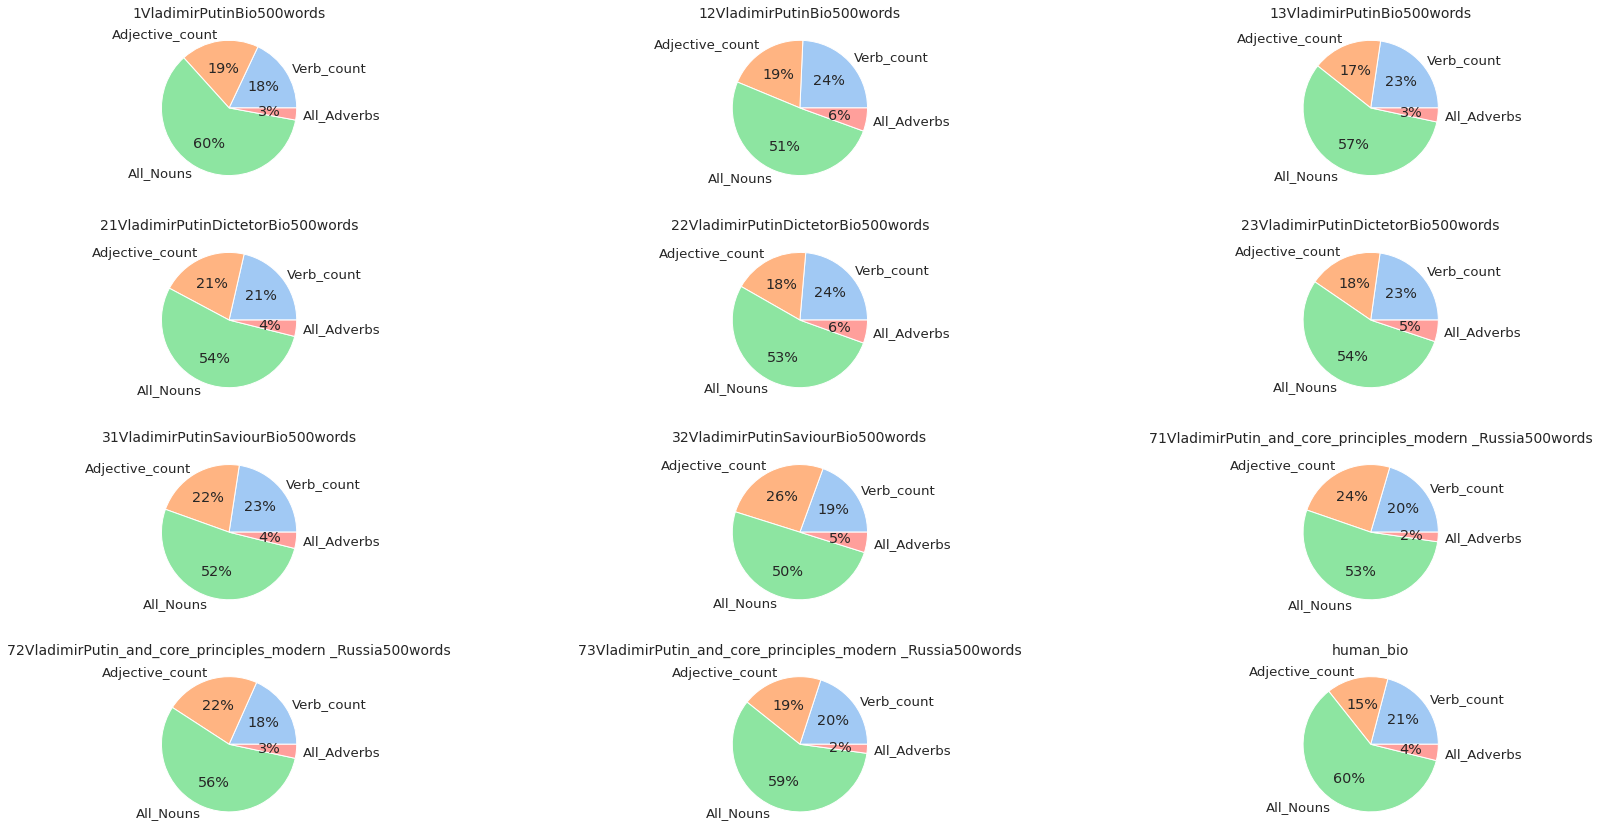

In [ ]:
from matplotlib.colorbar import layoutbox
## Graph pos token

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 3, figsize=(24,12))
fig.tight_layout()
colors = sns.color_palette('pastel')[0:5]

for col in range(len(pie_df.columns)):
  if col<=2:
    ax[0, col].pie(pie_df.iloc[:, col], labels = pie_df.index, colors = colors, autopct='%.0f%%')
    ax[0, col].set_title(pie_df.columns[col], fontsize = 14)
  if (col>2) &  (col<=5):
    ax[1, col-3].pie(pie_df.iloc[:, col], labels = pie_df.index, colors = colors, autopct='%.0f%%')
    ax[1, col-3].set_title(pie_df.columns[col], fontsize = 14)
  if (col>5) &  (col<=8):
    ax[2, col-6].pie(pie_df.iloc[:, col], labels = pie_df.index, colors = colors, autopct='%.0f%%')
    ax[2, col-6].set_title(pie_df.columns[col], fontsize = 14)
  if (col>8) &  (col<=11):
    ax[3, col-9].pie(pie_df.iloc[:, col], labels = pie_df.index, colors = colors, autopct='%.0f%%')
    ax[3, col-9].set_title(pie_df.columns[col], fontsize = 14)
plt.savefig('/content/drive/MyDrive/GPT/graphs/pie_all_long.jpg')

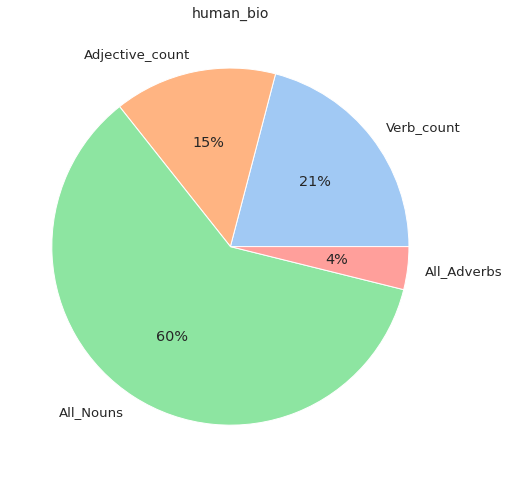

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,12))
colors = sns.color_palette('pastel')[0:5]

plt.pie(pie_df['human_bio'], labels = pie_df.index, colors = colors, autopct='%.0f%%')
plt.title('human_bio', fontsize = 14)

plt.savefig('/content/drive/MyDrive/GPT/graphs/pie_Human.jpg')

Qualitative Investigation : focus on accuracy and pester power 
susceptibility/ vulnerability

In [ ]:
key_words =['power', 'control', 'military', 'energy', 'politic opp', 'freedom', 'LGBT', 'popular', 'stabil', 'national', 'influence', 'strength', 'liberties',
            'strong', 'authorit', 'corruption', 'restor', 'centralize', 'traditional', 'econom', 'invest', 'welfare', 'human righ', 'assasin', 'conflict', 'standard of liv', 'protec', 'player',
            'inflation', 'foreign', 'security', 'Russian inter', 'assert', 'leader', 'prosper', 'order', 'international', 'democra',  'defense','innova', 'entrepr',
            'dissent', 'suppres', 'erosion', 'restrict', 'welfare']

In [ ]:
key_df_man = pd.DataFrame(key_words, columns=['key_words'])
key_df_man.head()
key_df_man.to_csv('/content/drive/MyDrive/GPT/key_words_manual_selection.csv')

In [ ]:
len(key_words)

46

In [ ]:
words_listo = []
occurance = []
text_name = []

for i in range(len(listo)):
  stringo = str(listo[i].keys())[12:-3]
  temp_token = listo[i][stringo][0]

  for item in key_words:
    text_name.append(stringo)
    occurance.append(temp_token.count(item))
    words_listo.append(item)

print(len(text_name))
print(len(occurance))
print(len(words_listo))

1380
1380
1380


In [ ]:
all_in_words = pd.DataFrame(zip(text_name, words_listo, occurance), columns =['Text_name', 'Key_Words', 'Occurances'])

In [ ]:
all_in_words['Key_Words'] =all_in_words['Key_Words'].str.replace('politic opp', 'poli_opp')

In [ ]:
all_in_words['Key_Words'] =all_in_words['Key_Words'].str.replace('human righ', 'human_R')

In [ ]:
all_in_words['Key_Words'] =all_in_words['Key_Words'].str.replace('liberties', 'freedom')

In [ ]:

all_in_words['Key_Words'] =all_in_words['Key_Words'].str.replace('international', 'abroad')

In [ ]:
all_in_words['Key_Words'] =all_in_words['Key_Words'].str.replace('strength', 'strong')

In [ ]:
all_in_words['Key_Words'] =all_in_words['Key_Words'].str.replace('standard of liv', 'econom')

In [ ]:
all_in_words['Key_Words'] =all_in_words['Key_Words'].str.replace('prosper', 'econom')

In [ ]:
all_in_words['Text_name'].unique()

array(['1VladimirPutinBio500words', '12VladimirPutinBio500words',
       '13VladimirPutinBio500words', '21VladimirPutinDictetorBio500words',
       '22VladimirPutinDictetorBio500words',
       '23VladimirPutinDictetorBio500words',
       '31VladimirPutinSaviourBio500words',
       '32VladimirPutinSaviourBio500words',
       '40VladimirPutinFather_of_Russia',
       '82Vladimir_Putin_ushering new RussiaCONCATfather',
       '83VladimirPutin_ ushering_new_RussiaCONCATfather',
       '41VladimirPutinFather_of_ModernRussia',
       '42VladimirPutinFather_of_Modern_Russia',
       '43VladimirPutinFather_of_Modern_Russia',
       '44VladimirPutinFather_of_Modern_Russia',
       '51VladimirPutinDestroyer_of_democracy_and _engineer_of_modern _Russia',
       '52VladimirPutinDestroyer_of_democracy_and _engineer_of_modern _Russia',
       '53VladimirPutinDestroyer_of_democracy_and _engineer_of_modern _Russia',
       '54VladimirPutinDestroyer_of_democracy_and _engineer_of_modern _Russia',
      

In [ ]:
def select_columns(number):
  temp = all_in_words[all_in_words['Text_name'].str.startswith(number)]
  temp = temp.sort_values(by='Key_Words')
  temp_over = temp[temp['Occurances']>0]
  return temp_over


In [ ]:
all_in_words.max()

Text_name     human_bio
Key_Words       welfare
Occurances            7
dtype: object

In [ ]:
strt_name = []
for item in range(1, 8):
  strt_name.append(str(item))
strt_name

['1', '2', '3', '4', '5', '6', '7']

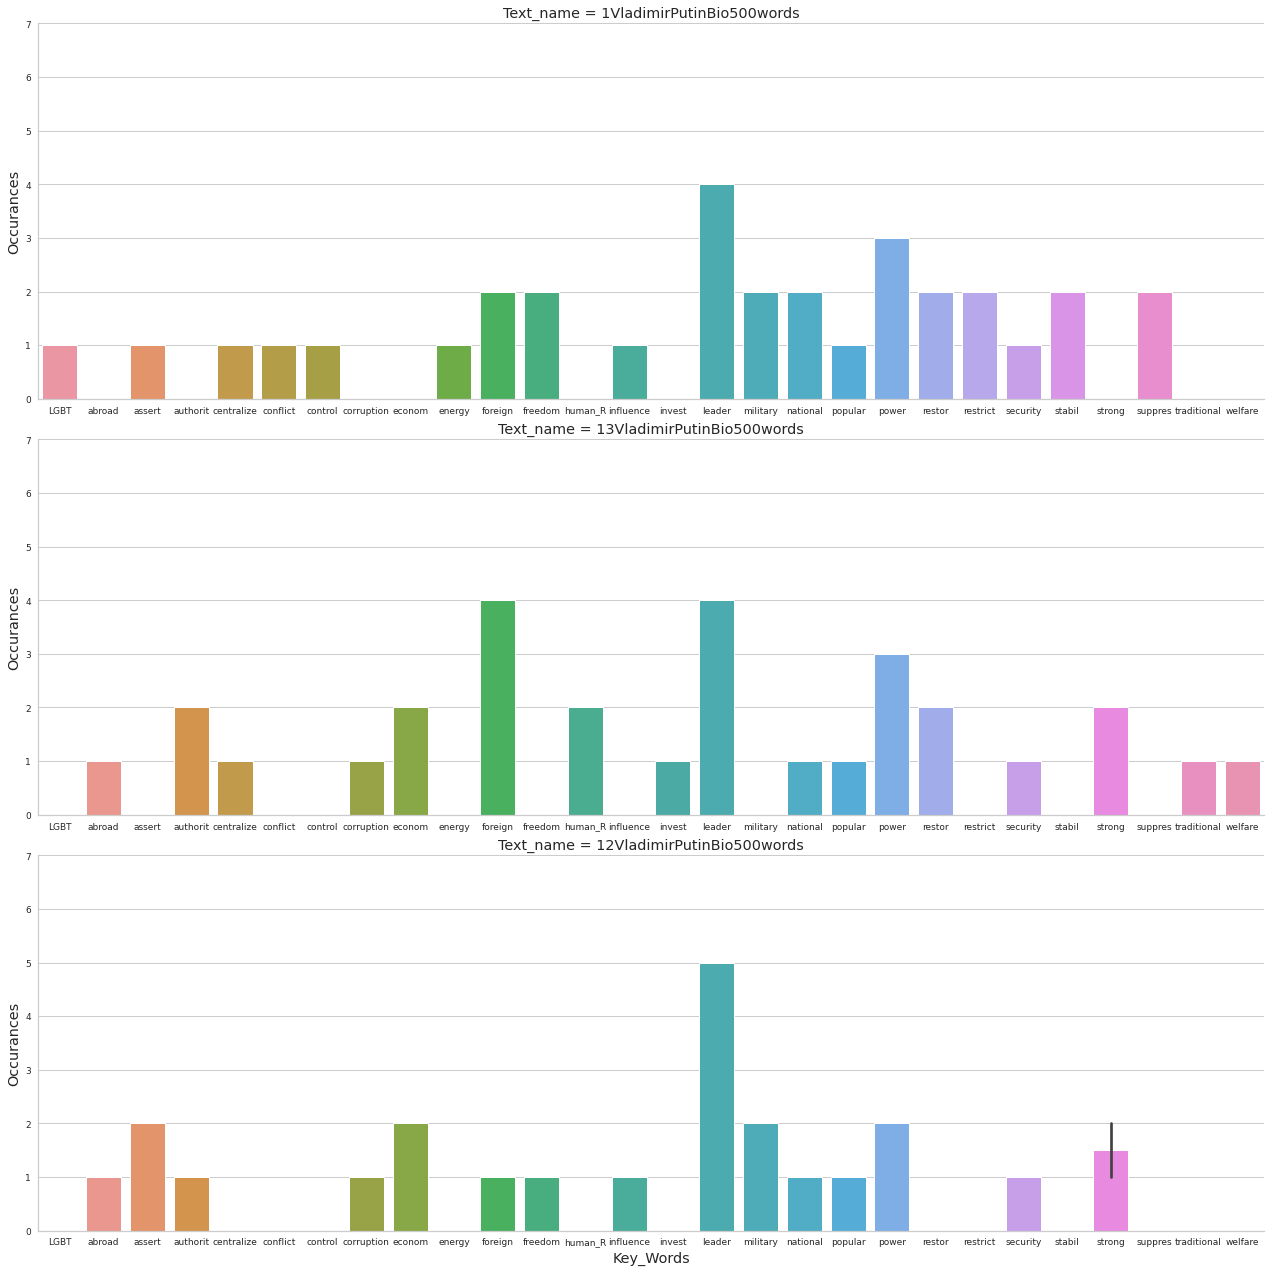

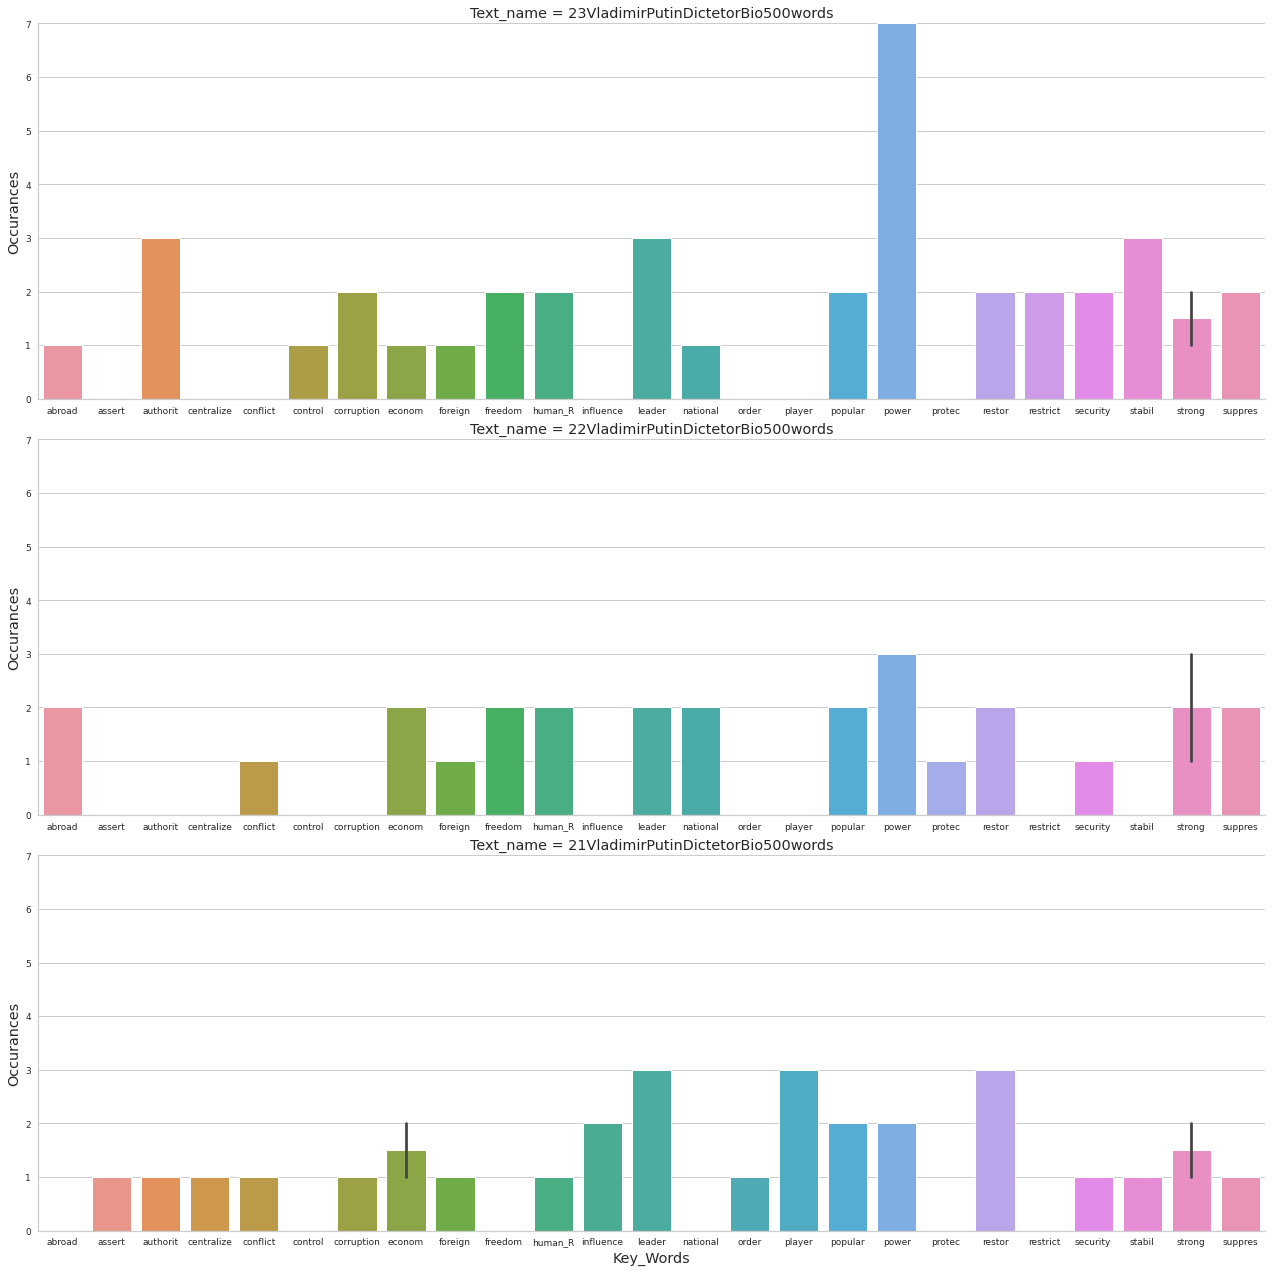

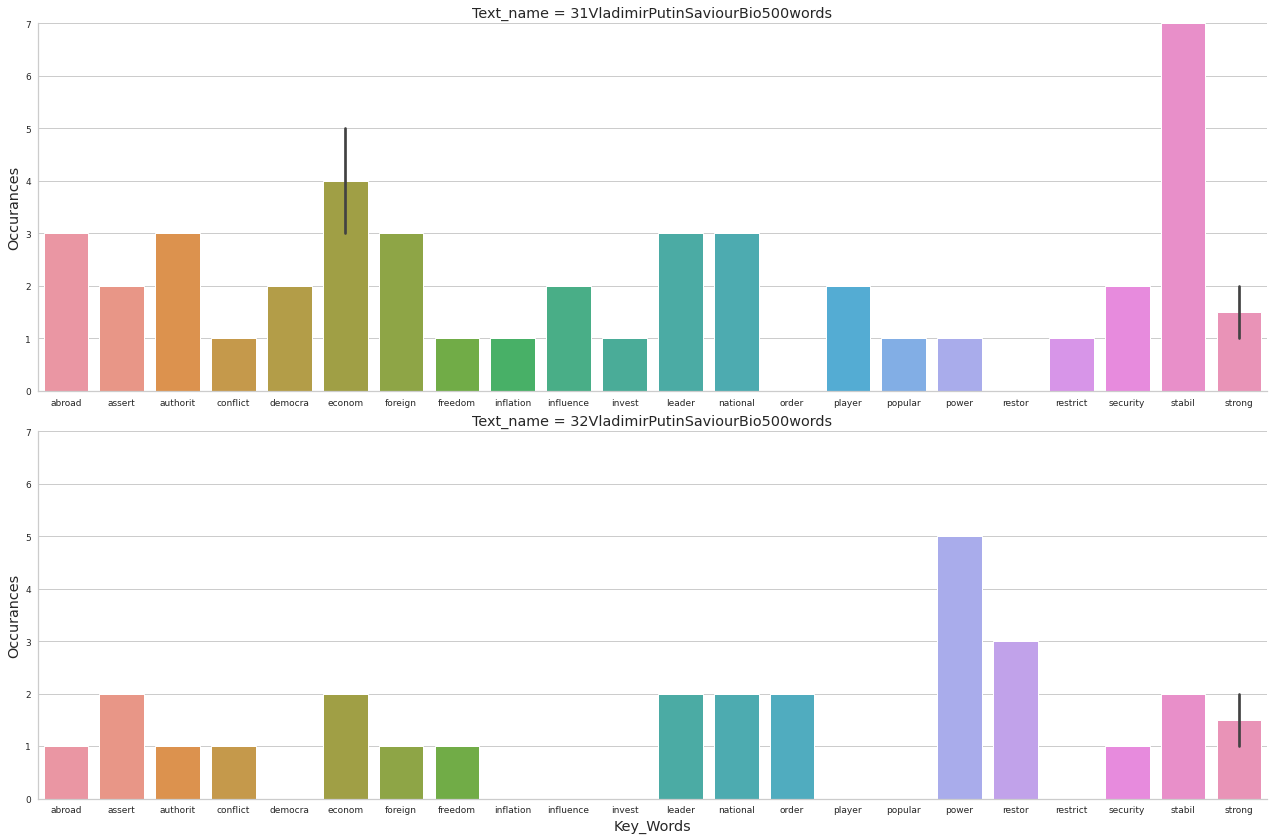

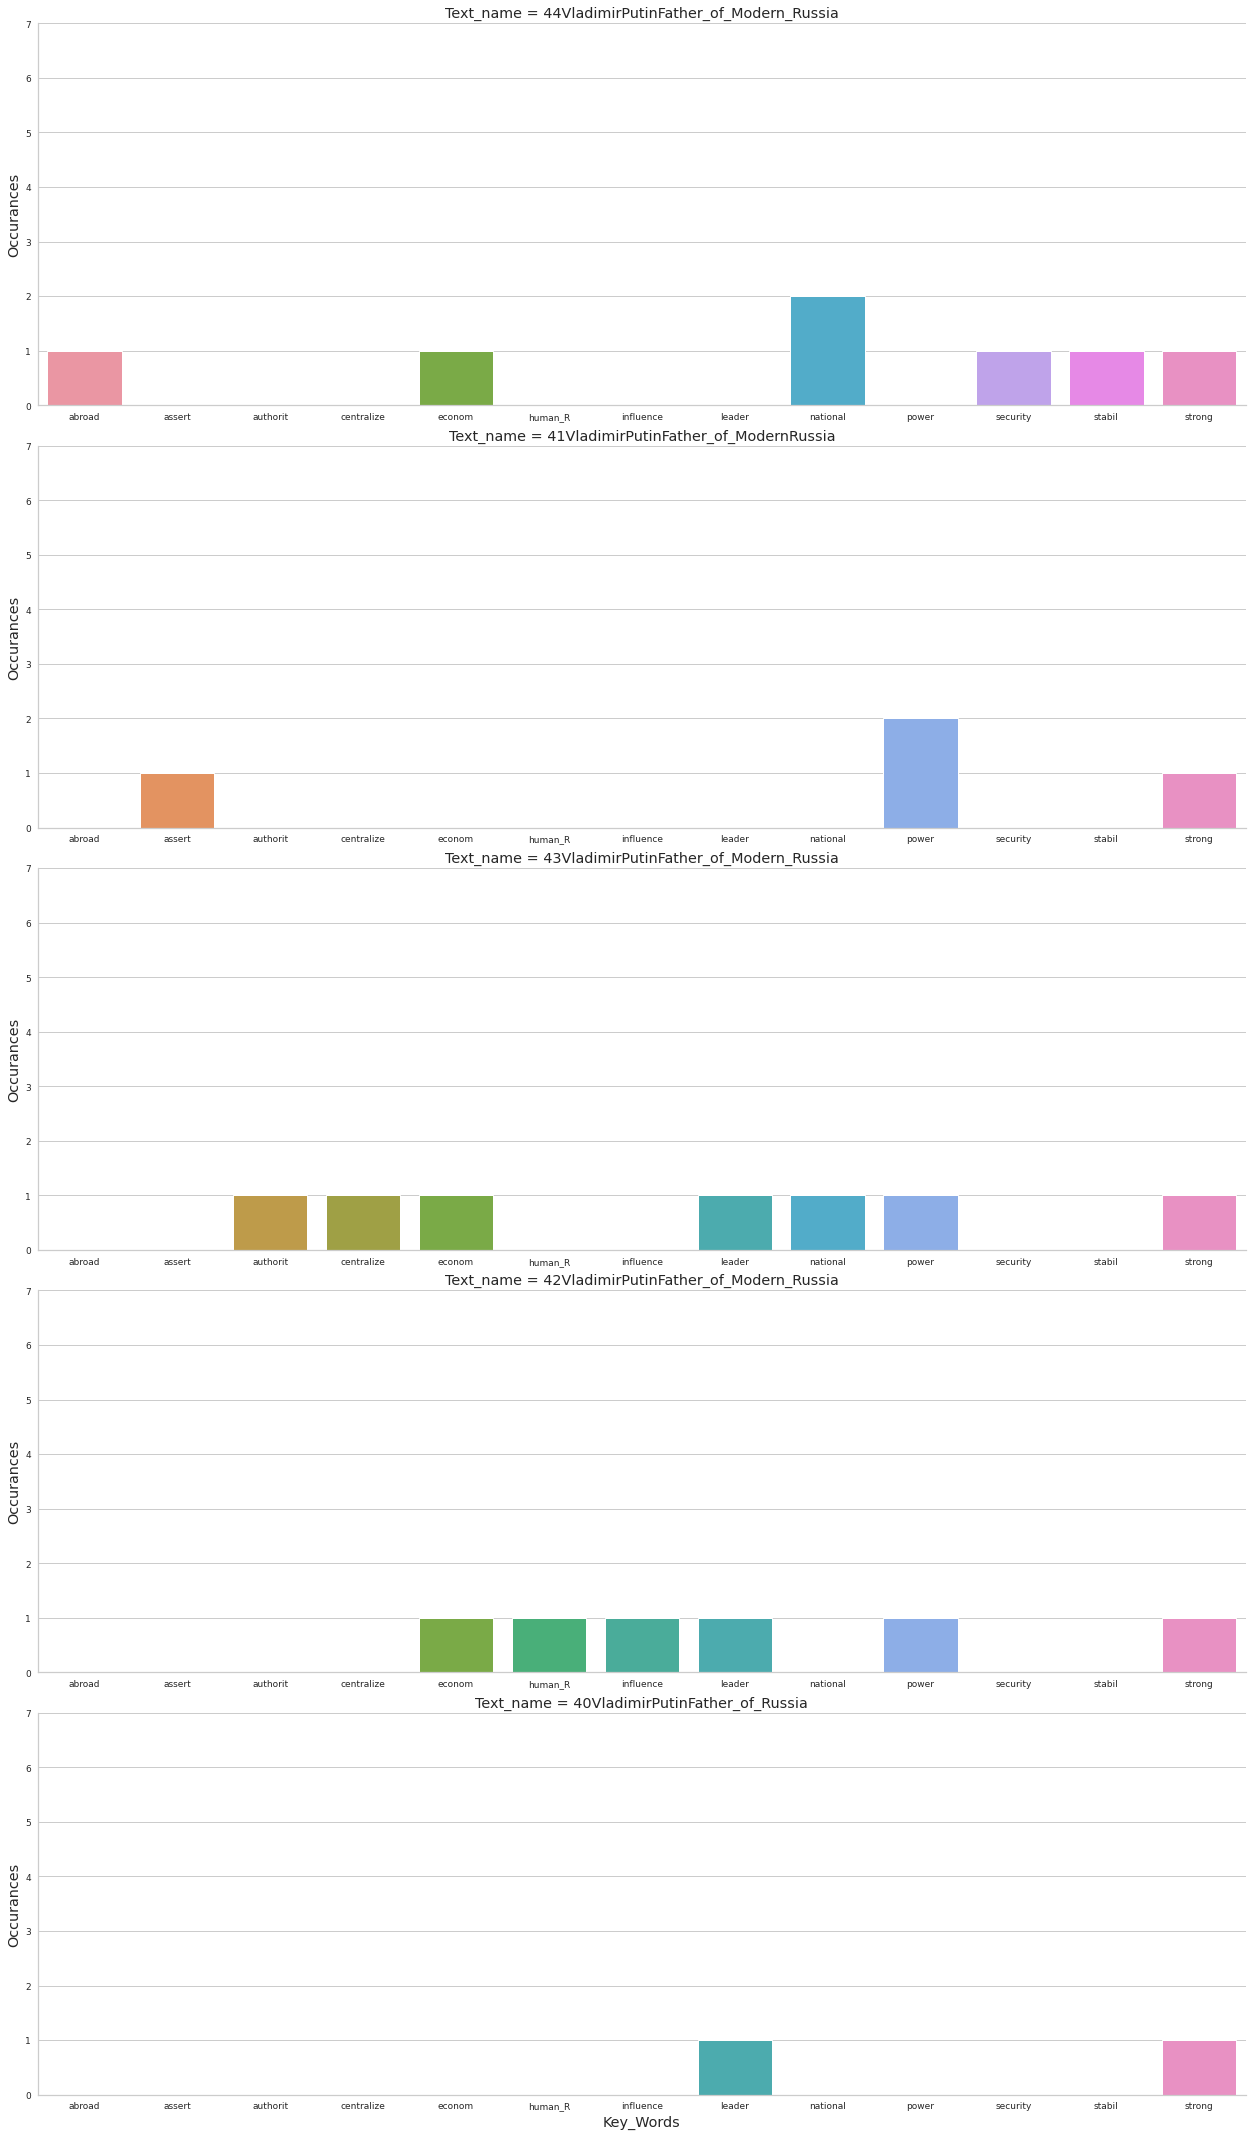

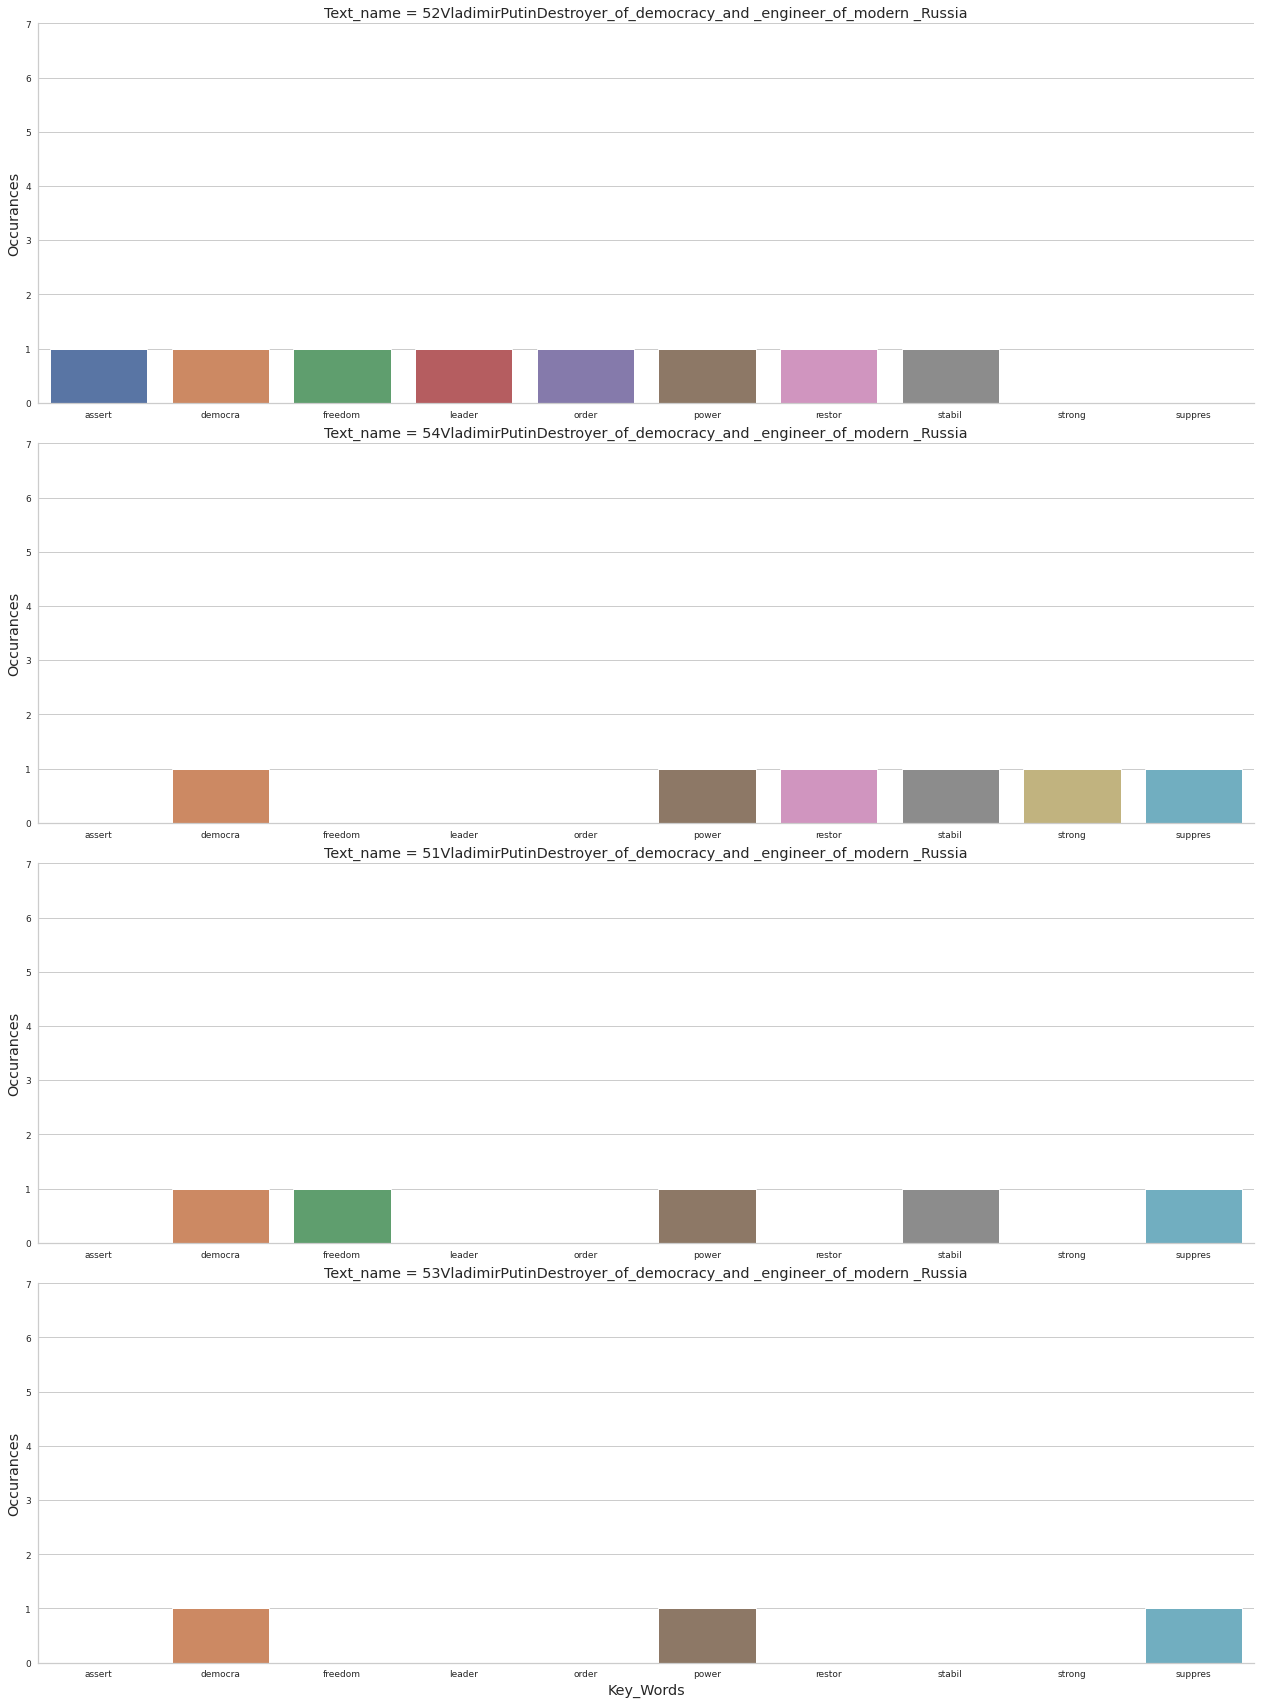

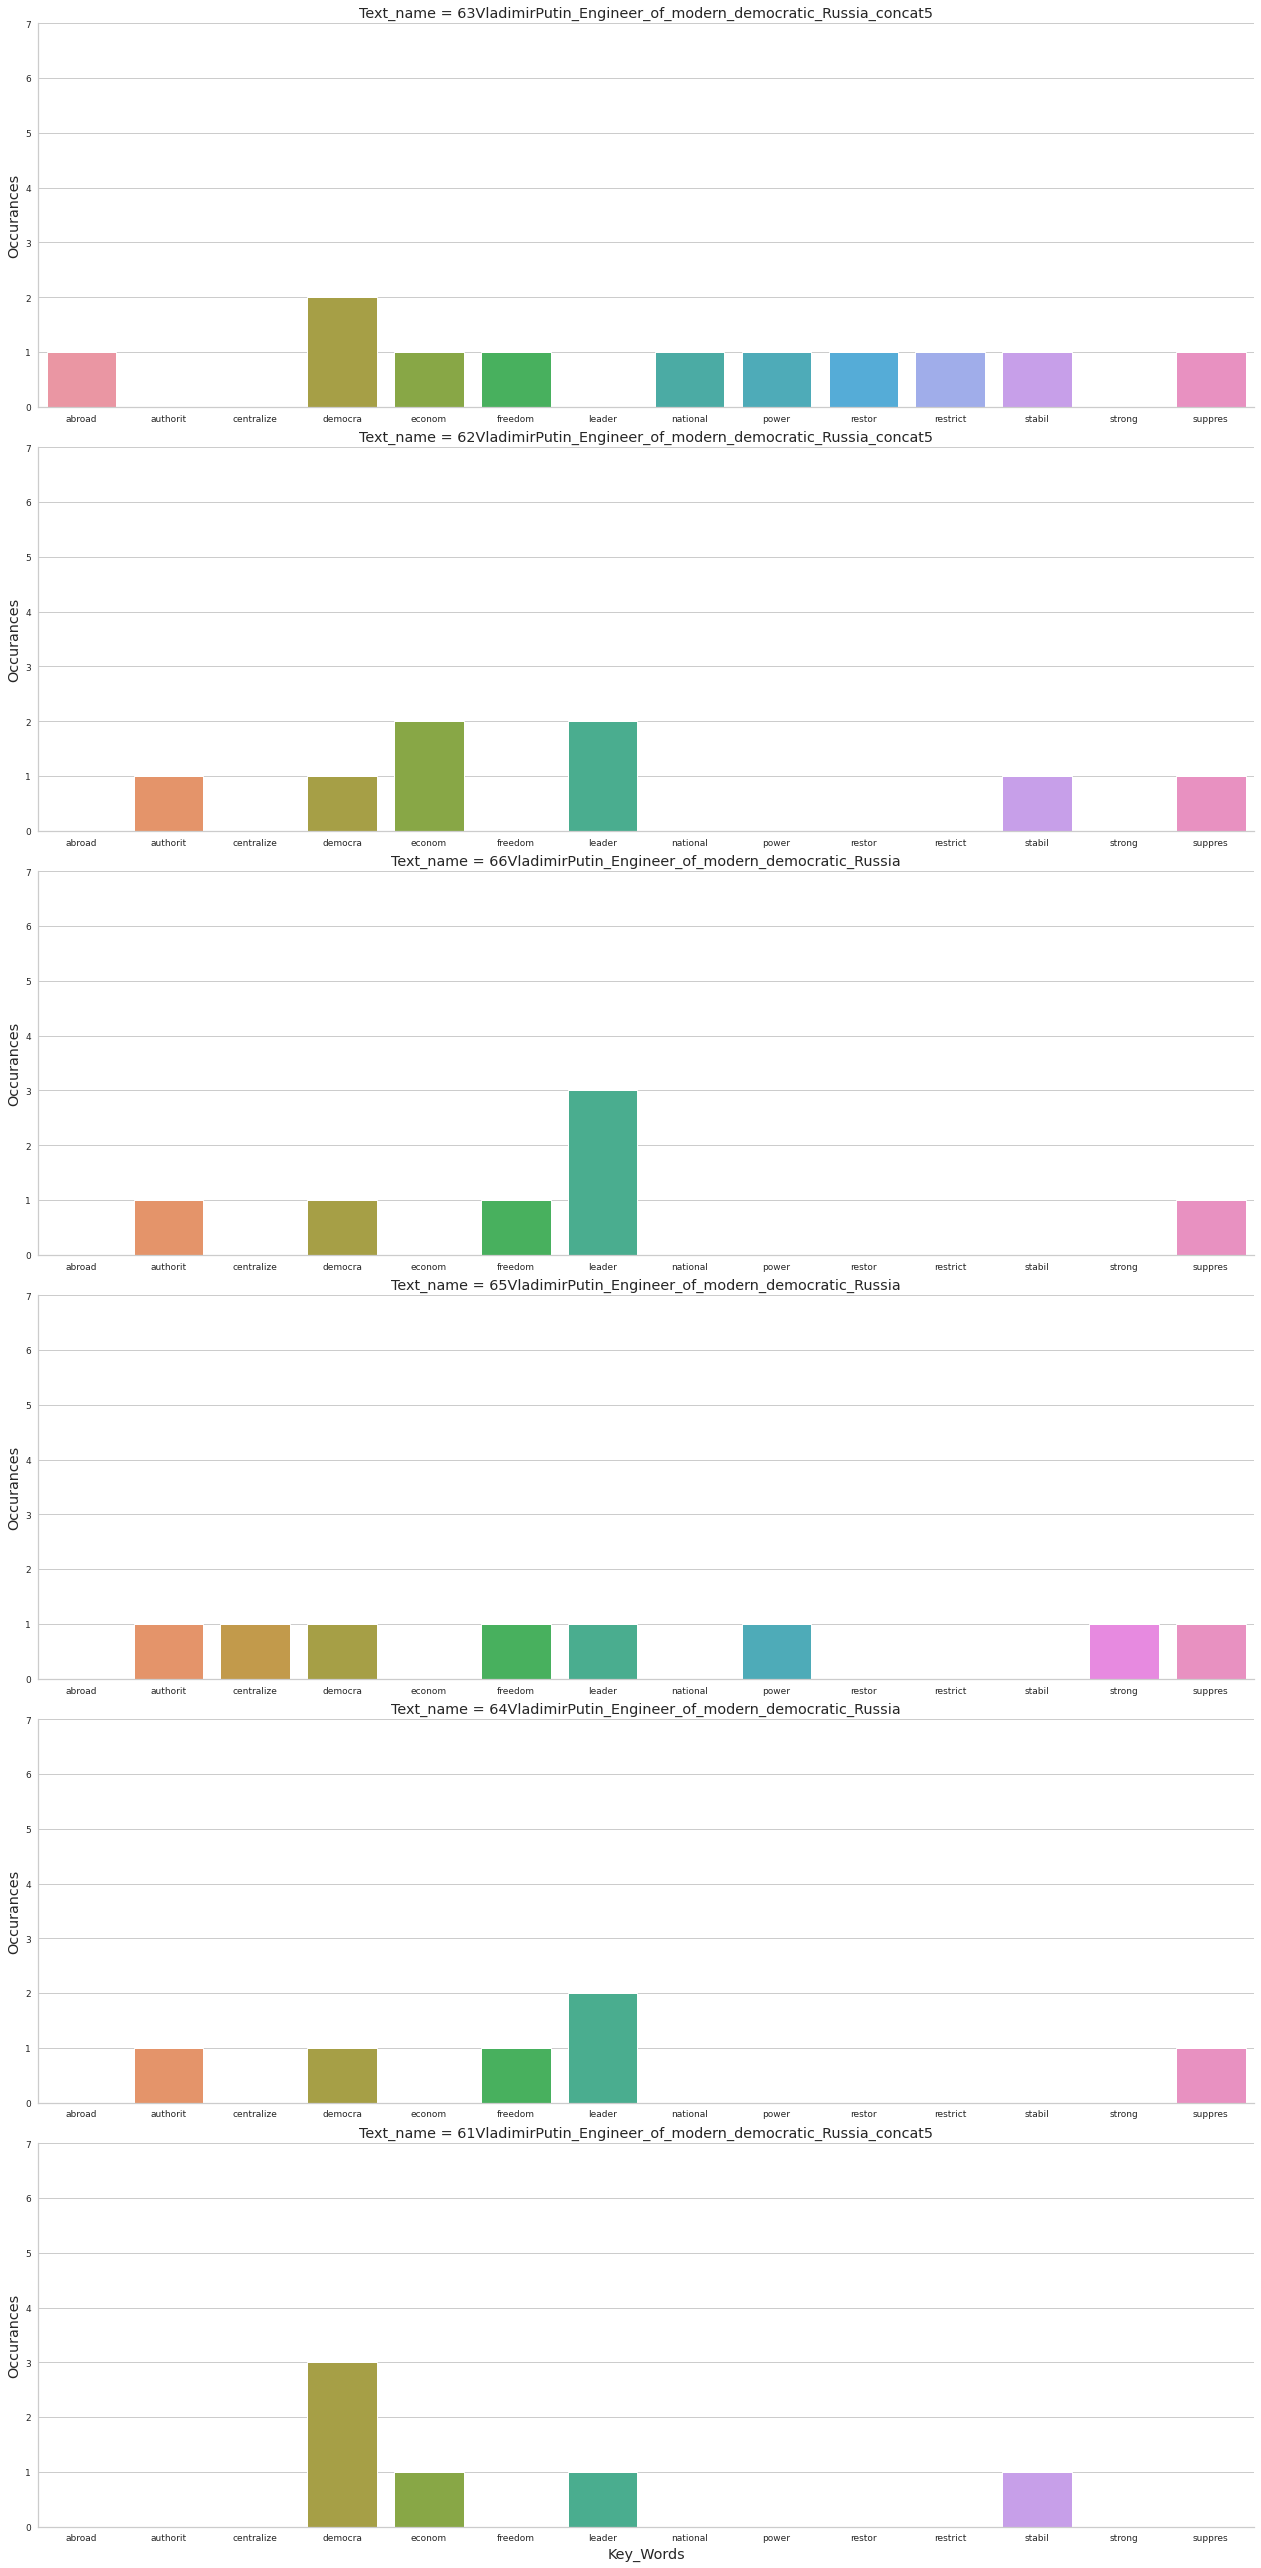

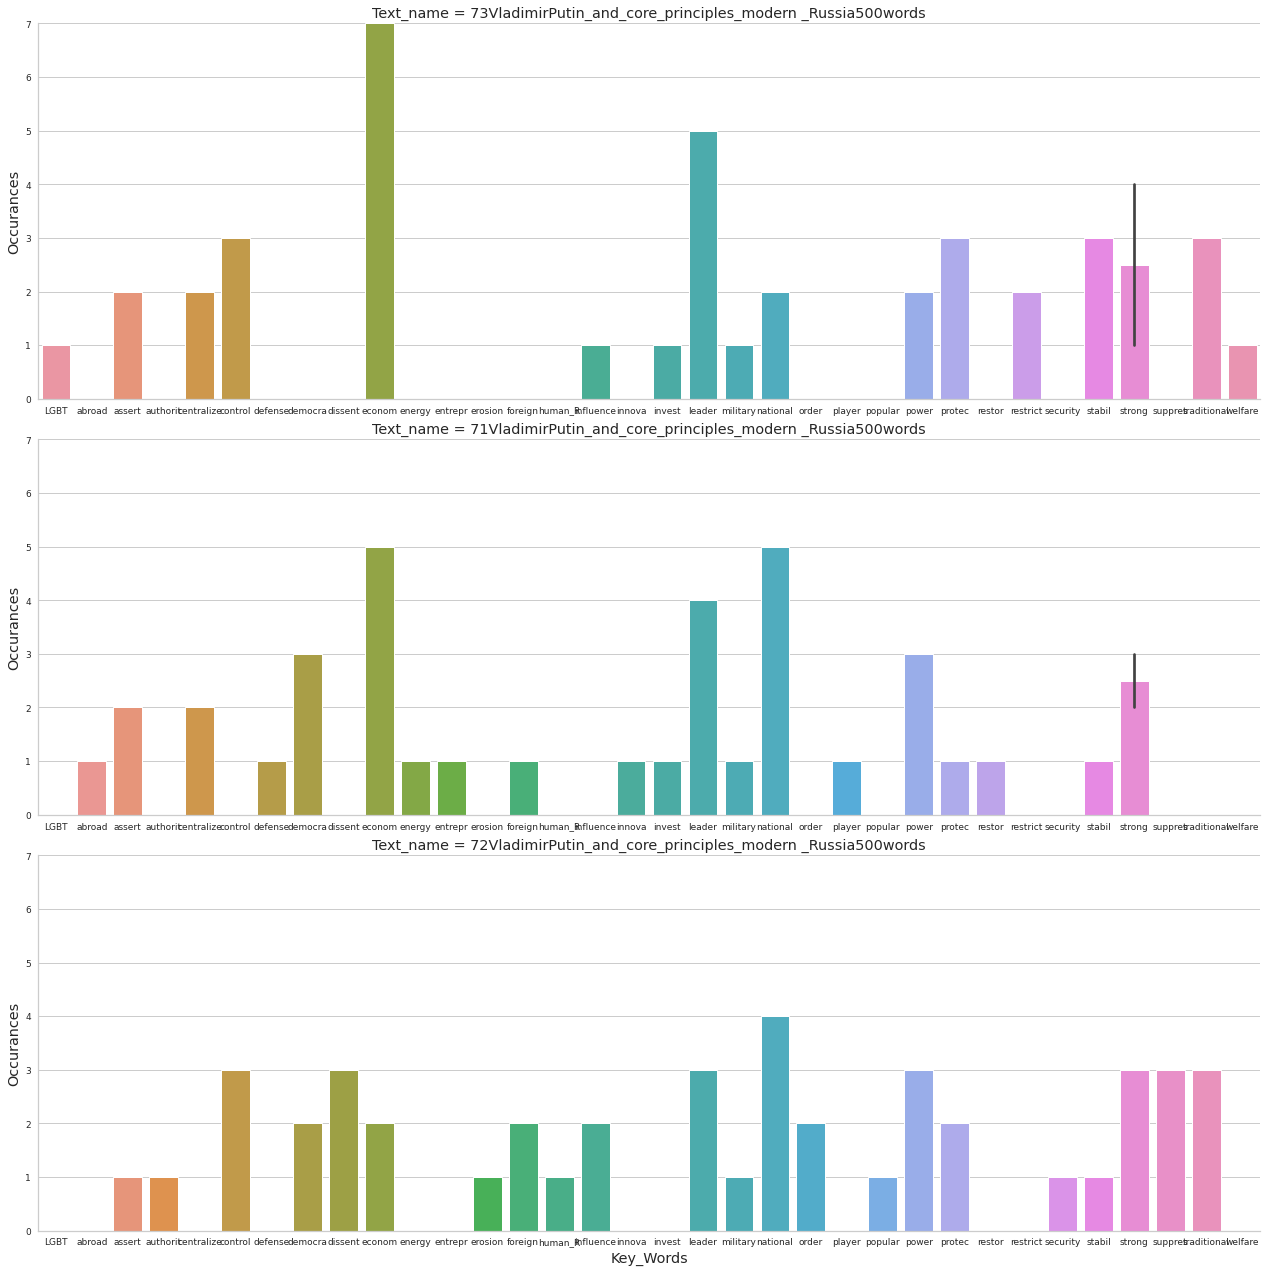

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.2)

for item in strt_name:
  g = sns.catplot(
      data=select_columns(item), x='Key_Words', y='Occurances', col='Text_name',
      kind="bar", height=6, aspect=3,col_wrap=1)
  g.set(ylim=(0, 7))
  for ax in g.axes.flatten():
      ax.tick_params(labelbottom=True, labelsize=9,pad=True)
  g.savefig(f'/content/drive/MyDrive/GPT/graphs/graph_file_name_{item}.jpg')

In [ ]:
father_all = (all_in_words[all_in_words.Text_name.str.contains('Father')])

In [ ]:
father_all.head()

,Text_name,Key_Words,Occurances
368,40VladimirPutinFather_of_Russia,power,0
369,40VladimirPutinFather_of_Russia,control,0
370,40VladimirPutinFather_of_Russia,military,0
371,40VladimirPutinFather_of_Russia,energy,0
372,40VladimirPutinFather_of_Russia,poli_opp,0


In [ ]:
father_all_gr = ((father_all.groupby(['Text_name', 'Key_Words'])['Occurances'].sum()).reset_index())#.set_index('Key_words')

father_all_pv = father_all_gr.pivot(index='Key_Words', columns='Text_name', values='Occurances')

father_all_pv.head()

Text_name,40VladimirPutinFather_of_Russia,41VladimirPutinFather_of_ModernRussia,42VladimirPutinFather_of_Modern_Russia,43VladimirPutinFather_of_Modern_Russia,44VladimirPutinFather_of_Modern_Russia
Key_Words,,,,,
LGBT,0,0,0,0,0
Russian inter,0,0,0,0,0
abroad,0,0,0,0,1
assasin,0,0,0,0,0
assert,0,1,0,0,0


In [ ]:
father_all_cl= father_all_pv[(father_all_pv.T != 0).any()]
father_all_cl.head()

Text_name,40VladimirPutinFather_of_Russia,41VladimirPutinFather_of_ModernRussia,42VladimirPutinFather_of_Modern_Russia,43VladimirPutinFather_of_Modern_Russia,44VladimirPutinFather_of_Modern_Russia
Key_Words,,,,,
abroad,0,0,0,0,1
assert,0,1,0,0,0
authorit,0,0,0,1,0
centralize,0,0,0,1,0
econom,0,0,1,1,1


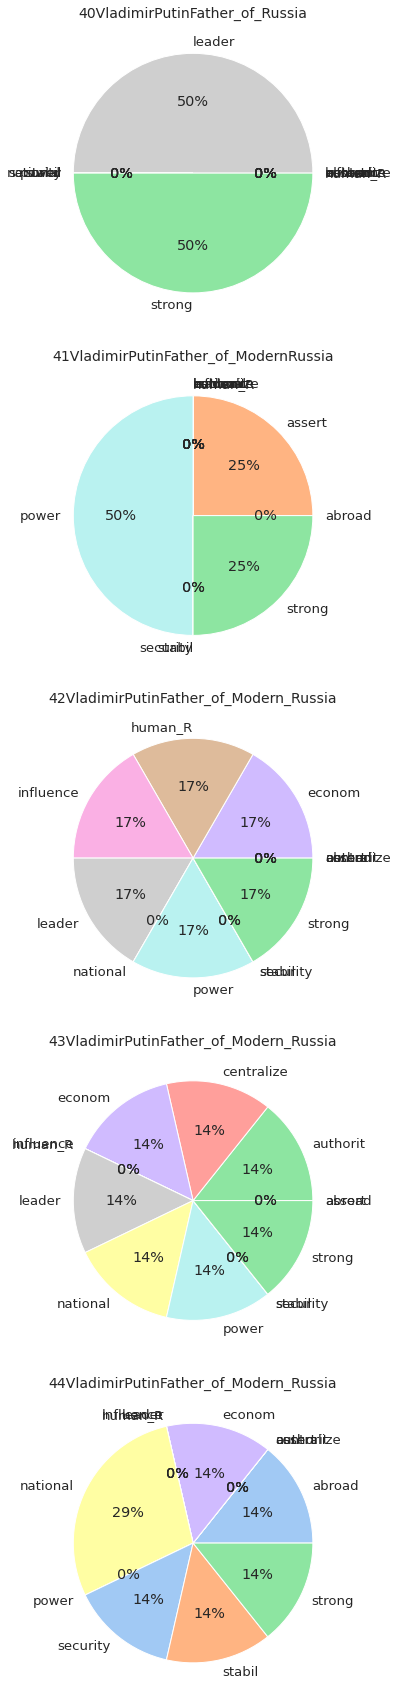

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colorbar import layoutbox

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 1, figsize=(12, 24))

fig.tight_layout()
colors = sns.color_palette('pastel')

for col in range(len(father_all_cl.columns)):
    ax[col].pie(father_all_cl.iloc[:, col], labels = father_all_cl.index, colors = colors, autopct='%.0f%%')
    ax[col].set_title(father_all_cl.columns[col], fontsize = 14)


plt.savefig('/content/drive/MyDrive/GPT/graphs/pie_fatehrs_all.jpg')

In [ ]:
#### USE FOR WORDS CLOUD

from nltk.tokenize import sent_tokenize, word_tokenize 

texto ='/content/drive/MyDrive/GPT/all_text_keep_separate/all_text_to_clean.txt'
with open(texto) as outfile:  # open for read
  alltext = outfile.read()  # read entire file
  clean_text = clean_up(alltext)
  clean_text = clean_text.replace('\n', ' ')


In [ ]:
clean_text

' Putin was born on October 7, 1952, in Leningrad (now St.Petersburg), Russia. He grew up in a communal apartment and his father was a factory foreman. Putin graduated from Leningrad State University in 1975 with a law degree. After graduation, Putin joined the KGB, the Soviet Union security agency. He served as a foreign intelligence officer until the collapse of the Soviet Union in 1991. In 1996, Putin was appointed head of the Federal Security Service, the KGB main successor agency. In 1999, Russia President Boris Yeltsin appointed Putin as prime minister. Yeltsin resigned on December 31 of that year, making Putin acting president. In 2000, Putin was elected president in his own right, and he was re-elected in 2004. Due to a constitutional term limit, Putin was unable to run for president again in 2008. Instead, Putin became prime minister under President Dmitry Medvedev. He was re-elected as president in 2012 and again in 2018. Putin has been the leader of Russia for over two decad

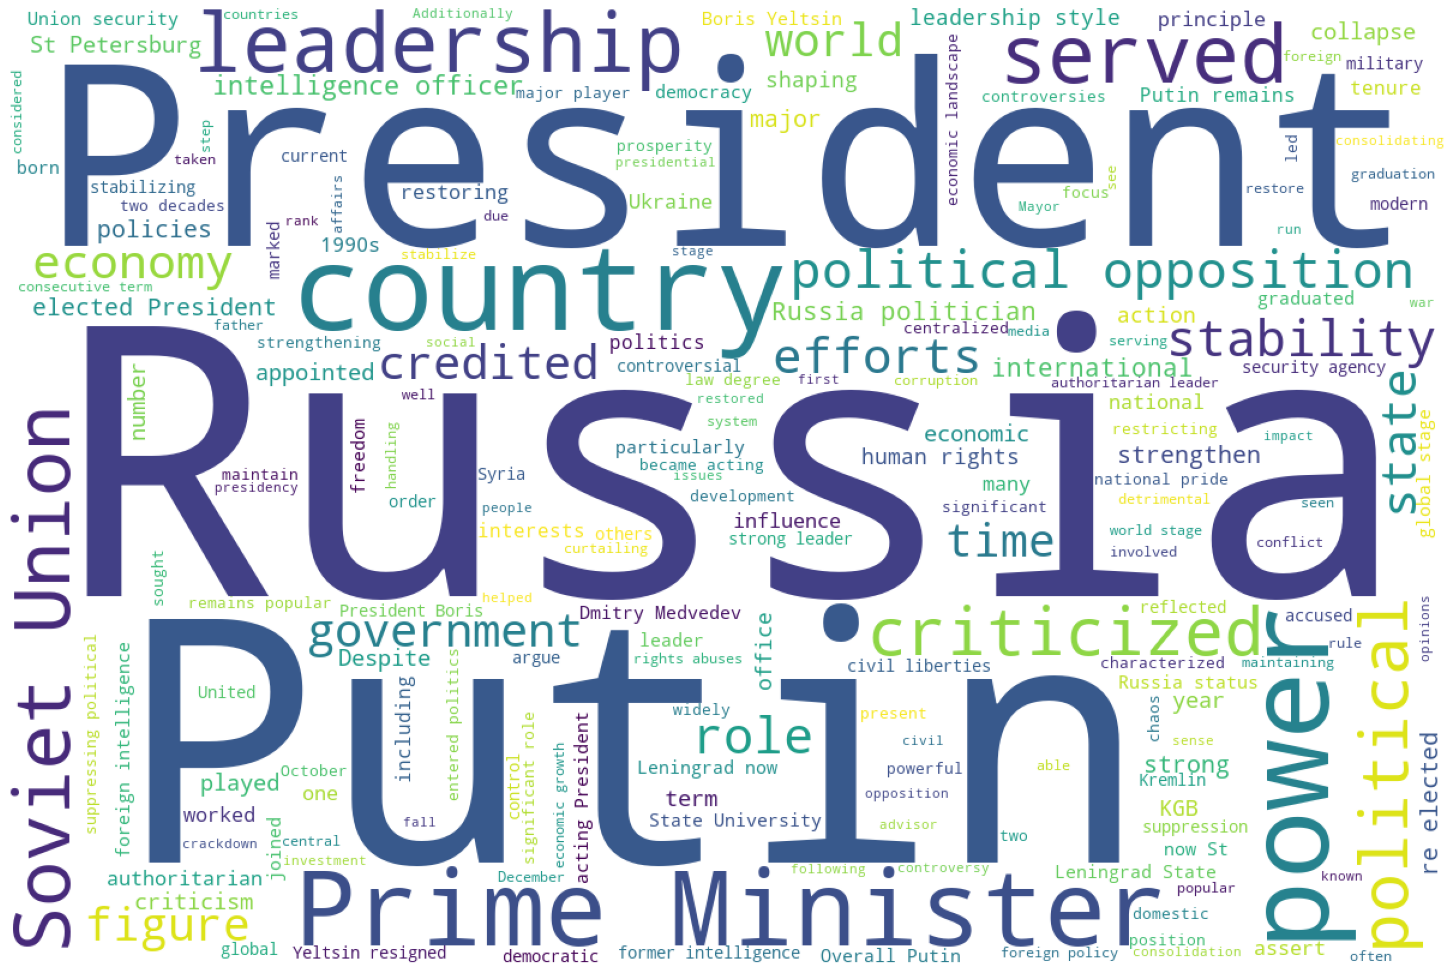

In [ ]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

 
wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                min_font_size = 10).generate(clean_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.savefig('/content/drive/MyDrive/GPT/graphs/world_cloud_all.jpg', bbox_inches='tight')

In [ ]:
testo = ((all_in_words.groupby(['Text_name', 'Key_Words'])['Occurances'].sum()).reset_index())#.set_index('Key_words')

testo_pv = testo.pivot(index='Key_Words', columns='Text_name', values='Occurances')

In [ ]:
bios_3_all = testo_pv [['13VladimirPutinBio500words','23VladimirPutinDictetorBio500words','32VladimirPutinSaviourBio500words']]
bios_3_all.head()

Text_name,13VladimirPutinBio500words,23VladimirPutinDictetorBio500words,32VladimirPutinSaviourBio500words
Key_Words,,,
LGBT,0,0,0
Russian inter,0,0,0
abroad,1,1,1
assasin,0,0,0
assert,0,0,2


In [ ]:
bios_3_all_graph = bios_3_all[(bios_3_all.T != 0).any()]

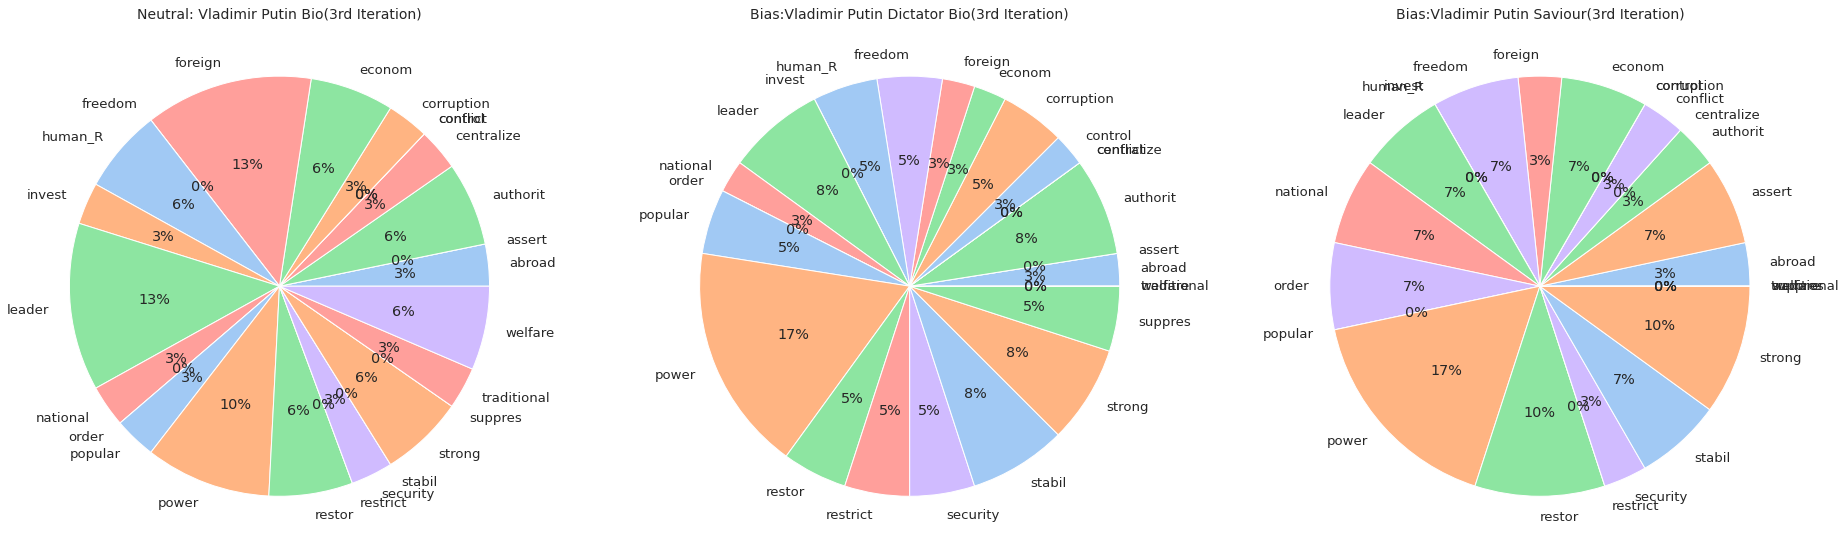

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(32,18))
colors = sns.color_palette('pastel')[0:5]


ax[0].pie(bios_3_all_graph['13VladimirPutinBio500words'], labels = bios_3_all_graph.index, colors = colors, autopct='%.0f%%')
ax[0].set_title('Neutral: Vladimir Putin Bio(3rd Iteration)', fontsize = 14)

ax[1].pie(bios_3_all_graph['23VladimirPutinDictetorBio500words'], labels = bios_3_all_graph.index, colors = colors, autopct='%.0f%%')
ax[1].set_title('Bias:Vladimir Putin Dictator Bio(3rd Iteration)', fontsize = 14)

ax[2].pie(bios_3_all_graph['32VladimirPutinSaviourBio500words'], labels = bios_3_all_graph.index, colors = colors, autopct='%.0f%%')
ax[2].set_title('Bias:Vladimir Putin Saviour(3rd Iteration)', fontsize = 14)

plt.savefig('/content/drive/MyDrive/GPT/graphs/pie_Bios_selected_bio.jpg')

In [ ]:
filt1 = all_in_words[all_in_words['Key_Words'].str.contains('authorit|power|strong')]
filt2 = (filt1.set_index('Text_name').T)[bios_3_all_graph.columns].T.reset_index()

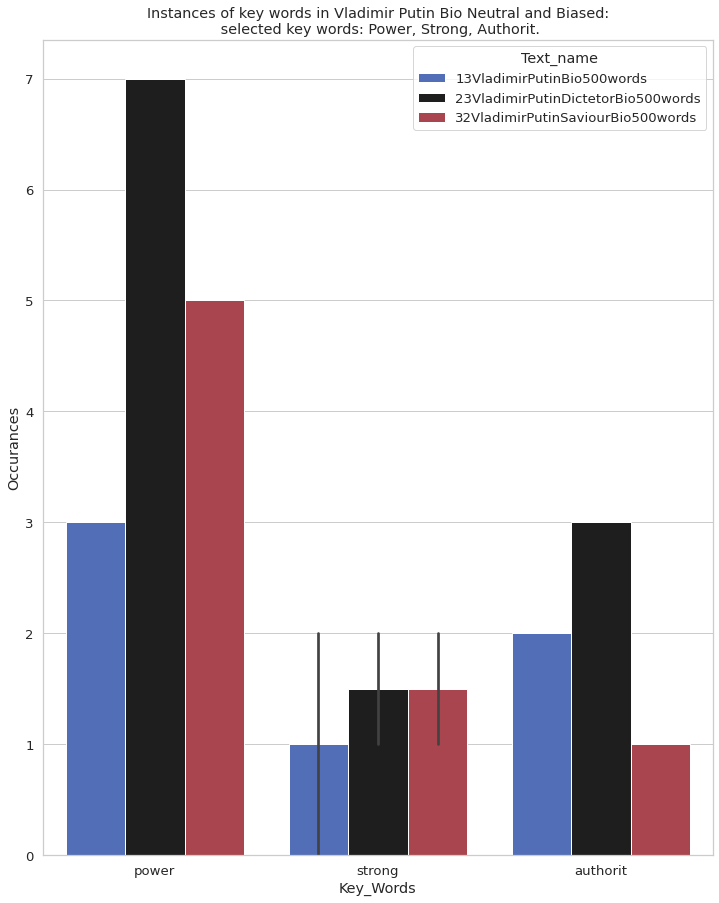

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize = (12,15))

sns.barplot(data=filt2, x='Key_Words', y='Occurances', hue='Text_name', palette='icefire')

plt.title('Instances of key words in Vladimir Putin Bio Neutral and Biased:\n selected key words: Power, Strong, Authorit.')

plt.savefig('/content/drive/MyDrive/GPT/graphs/pie_Bios_selected_KeyWords.jpg')

POS tag list:

CC	coordinating conjunction

CD	cardinal digit

DT	determiner

EX	existential there (like: "there is" ... think of it like "there exists")

FW	foreign word

IN	preposition/subordinating conjunction

JJ	adjective	'big'

JJR	adjective, comparative	'bigger'

JJS	adjective, superlative	'biggest'

LS	list marker	1)

MD	modal	could, will

NN	noun, singular 'desk'

NNS	noun plural	'desks'

NNP	proper noun, singular	'Harrison'

NNPS	proper noun, plural	'Americans'

PDT	predeterminer	'all the kids'

POS	possessive ending	parent\'s

PRP	personal pronoun	I, he, she

PRP\$	possessive pronoun	my, his, hers

RB	adverb	very, silently,

RBR	adverb, comparative	better

RBS	adverb, superlative	best

RP	particle	give up

TO	to	go 'to' the store.

UH	interjection	errrrrrrrm

VB	verb, base form	take

VBD	verb, past tense	took

VBG	verb, gerund/present participle	taking

VBN	verb, past participle	taken

VBP	verb, sing. present, non-3d	take

VBZ	verb, 3rd person sing. present	takes

WDT	wh-determiner	which

WP	wh-pronoun	who, what

WP$	possessive wh-pronoun	whose

WRB	wh-abverb	where, when
